<a href="https://colab.research.google.com/github/FremyXS/ProjectML/blob/main/ProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from termcolor import colored as cl # text customization
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn import metrics 
from sklearn.metrics import r2_score as r2 # evaluation metric

%matplotlib inline

##Loading and preparing data

####There are 15 independent variables (including id):

- store_sales: Store sales in millions.
- unit_sales: Quantity of units sold.
- total_children: Total children in home.
- num_children_at_home: Total children at home as per customer filled details.
- avg_cars_at_home: Average cars at home.
- gross_weight: Gross weight of an item.
- recyclable_package: If the package of the food item is recycleble 1 or not 0.
- low_fat: If an item is a low fat 1 or not 0.
- units_per_case: Units/case units available in each store shelves.
- store_sqft: Store area available in sqft.
- coffee_bar: If a store has a coffee bar available 1 or not 0.
- video_store: If a video store/gaming store is available 1 or not 0.
- salad_bar: if a salad bar is available in a store 1 or not 0.
- prepared_food: if a prepared food is available in a store 1 or not 0.
- florist: if flower shelves are available in a store 1 or not 0.

#### Target varibale:

- cost:  Cost on acquiring a customers in dollars.

In [436]:
train_data = pd.read_csv('sample_data/train.csv')
test_data = pd.read_csv('sample_data/test.csv')
train_data.drop(['id'], axis = 1, inplace = True)
test_data.drop(['id'], axis = 1, inplace = True)
train_data

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


In [437]:
test_data

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


In [438]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food 

In [439]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    240224 non-null  float64
 1   unit_sales(in millions)     240224 non-null  float64
 2   total_children              240224 non-null  float64
 3   num_children_at_home        240224 non-null  float64
 4   avg_cars_at home(approx).1  240224 non-null  float64
 5   gross_weight                240224 non-null  float64
 6   recyclable_package          240224 non-null  float64
 7   low_fat                     240224 non-null  float64
 8   units_per_case              240224 non-null  float64
 9   store_sqft                  240224 non-null  float64
 10  coffee_bar                  240224 non-null  float64
 11  video_store                 240224 non-null  float64
 12  salad_bar                   240224 non-null  float64
 13  prepared_food 

In [440]:
train_data.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [441]:
test_data.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000
mean,6.353813,3.043930,2.454039,0.685381,2.198173,13.828380,0.565747,0.326928,18.959933,28174.648840,0.564173,0.275647,0.504396,0.504429,0.501815
std,3.307402,0.782982,1.487416,1.211368,1.085129,4.623458,0.495660,0.469092,10.216219,5974.494735,0.495866,0.446841,0.499982,0.499981,0.499998
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.800000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Research-based data analysis

###Visualizations of the main column "cost"

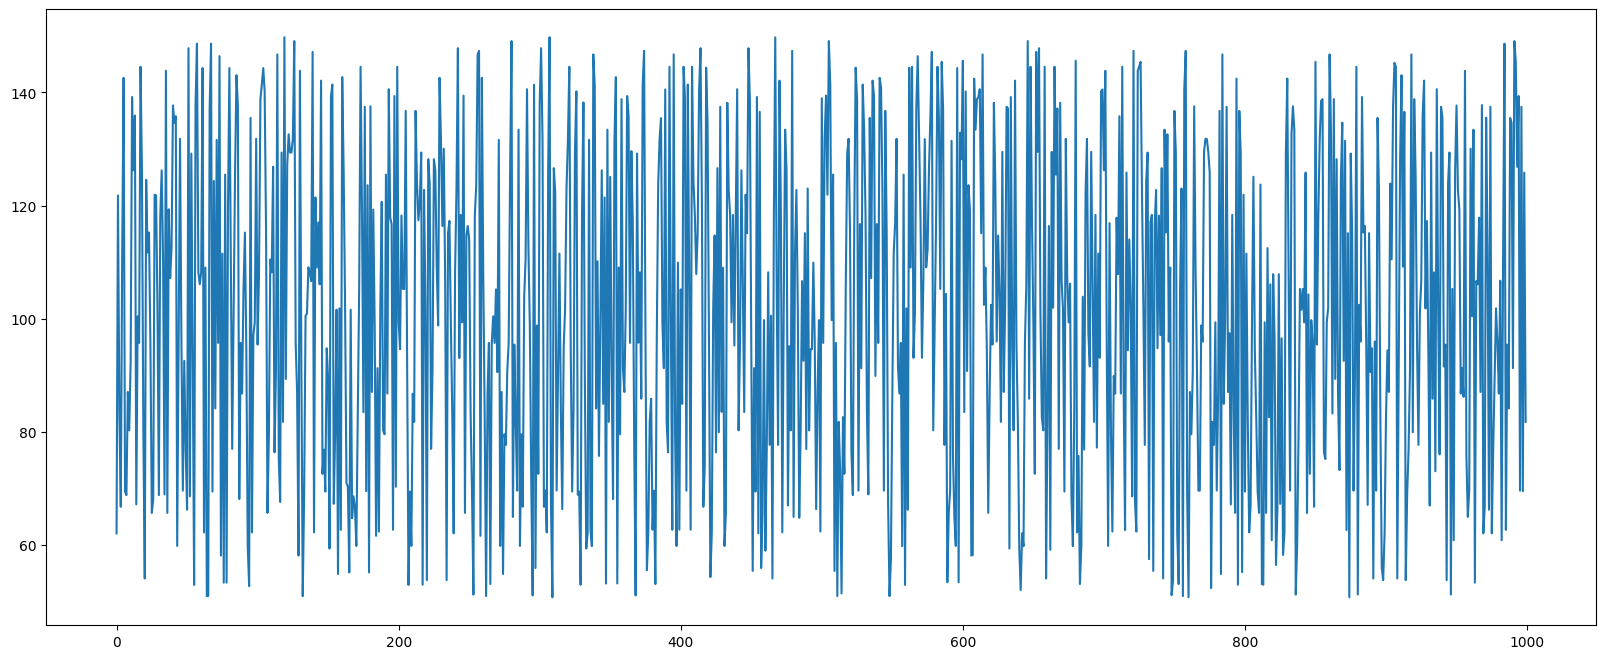

In [442]:
plt.figure(figsize=(20, 8)) # resizing the plot
plt.plot(train_data['cost'][:1000])
plt.show()

<Axes: >

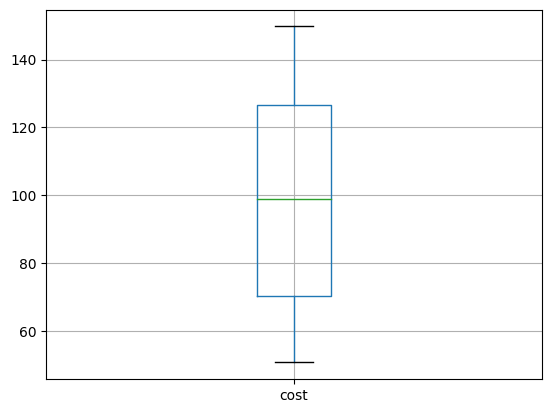

In [443]:
train_data.boxplot(column=['cost'])

###Visualizations of the other columns

<Figure size 3000x800 with 0 Axes>

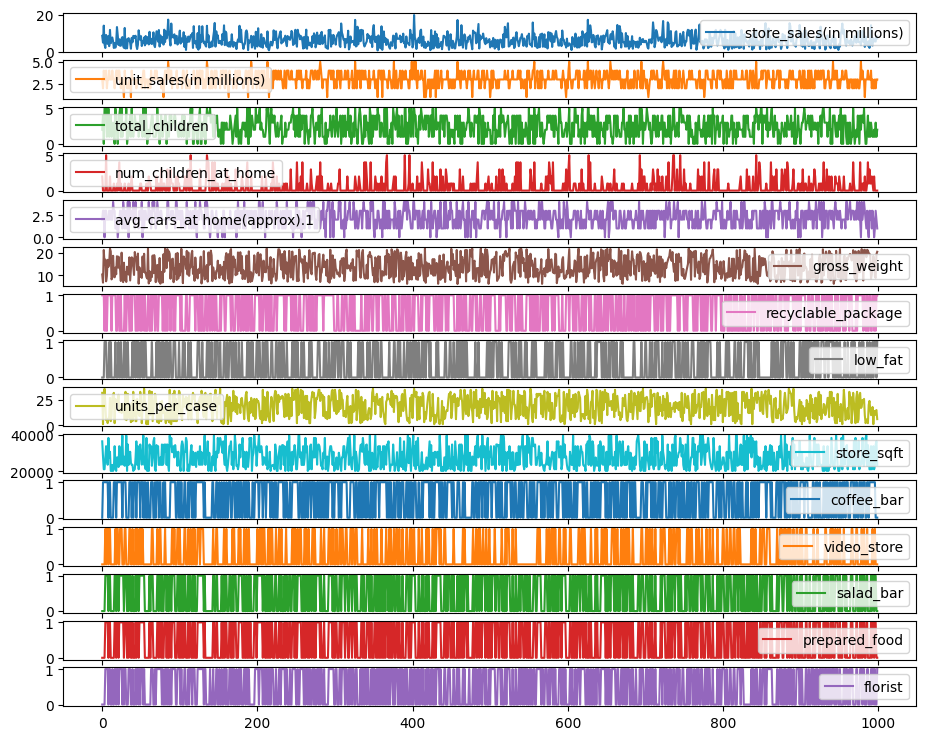

In [444]:
plt.figure(figsize=(30, 8)) # resizing the plot
cols = train_data.columns.drop('cost')
axes = train_data[:1000][cols].plot(figsize=(11, 9), subplots = True)
plt.show()

<Figure size 3000x800 with 0 Axes>

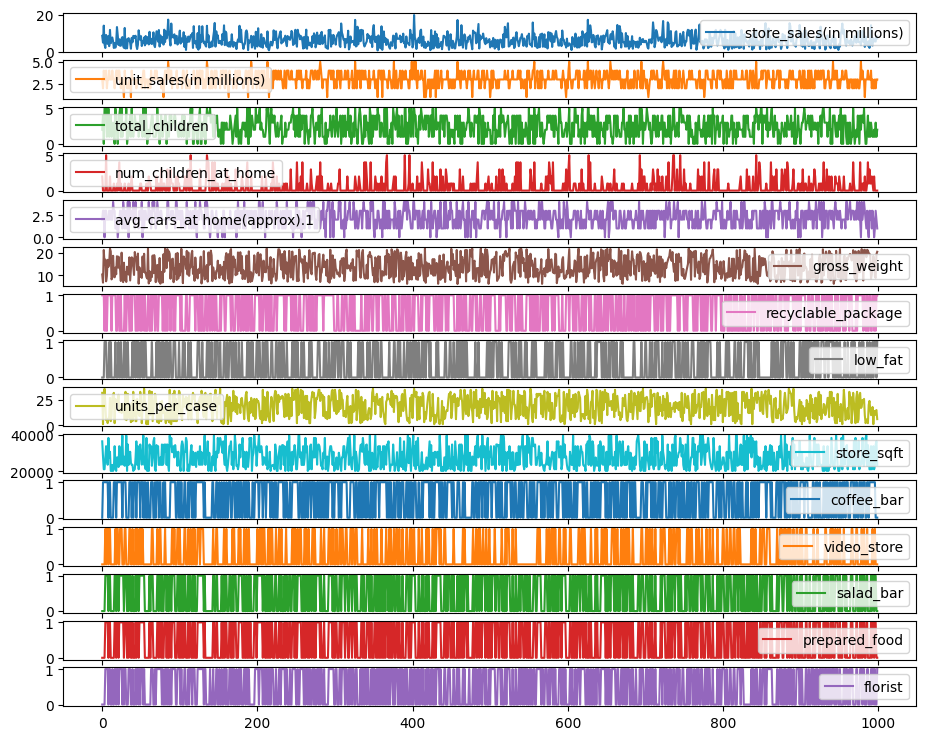

In [445]:
plt.figure(figsize=(30, 8)) # resizing the plot
axes = train_data[:1000][test_data.columns].plot(figsize=(11, 9), subplots = True)
plt.show()

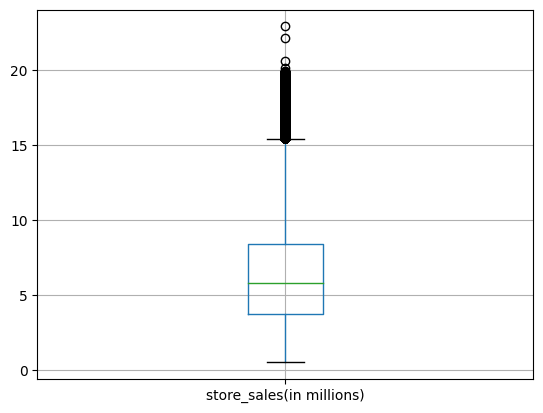

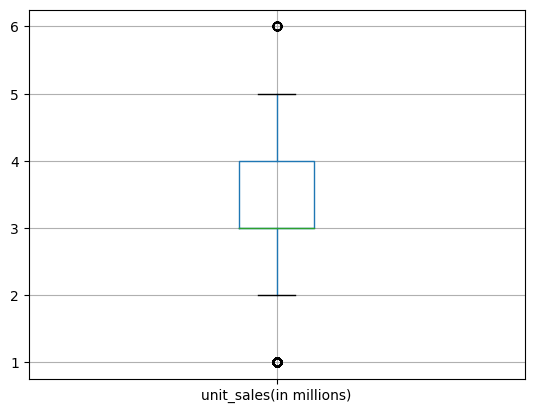

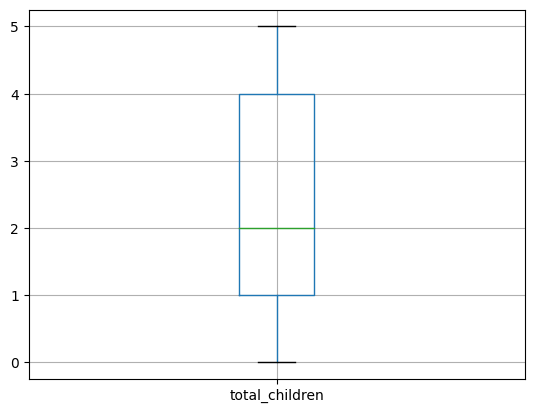

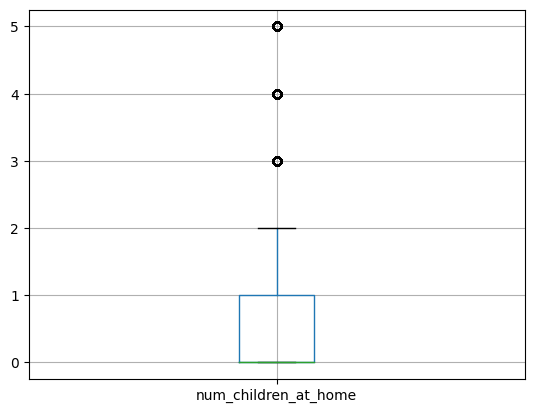

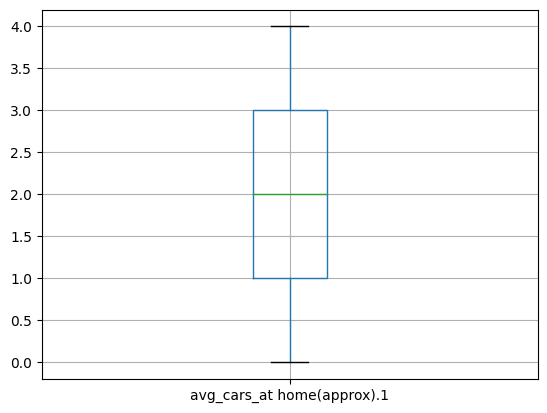

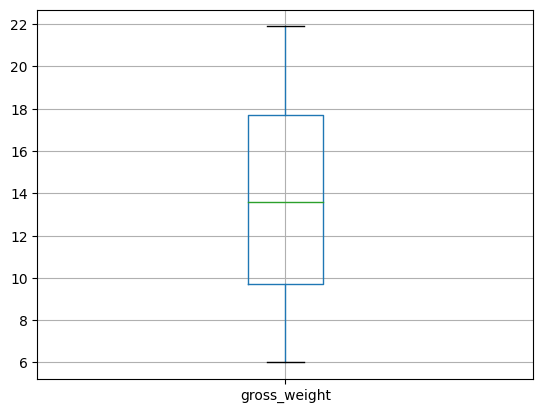

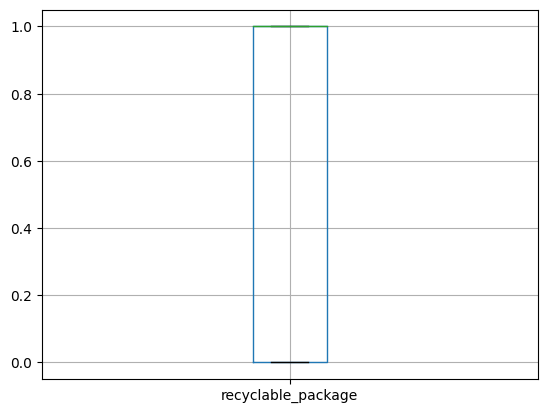

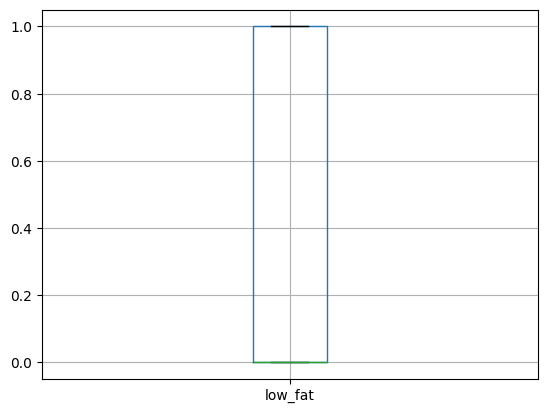

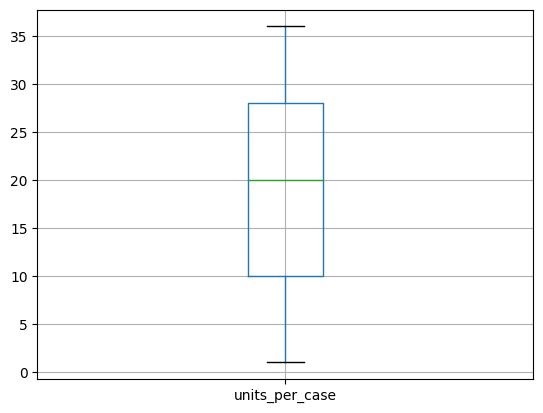

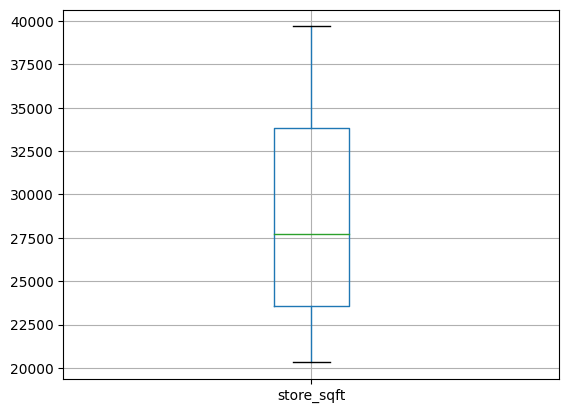

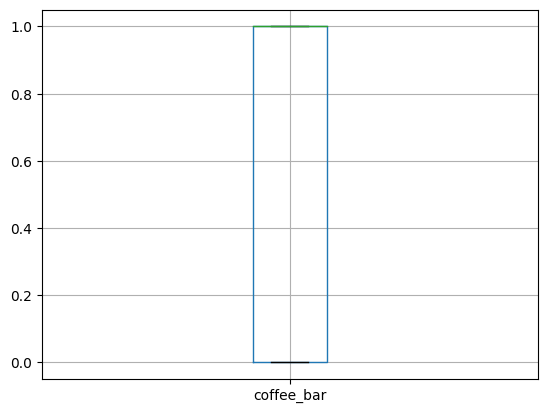

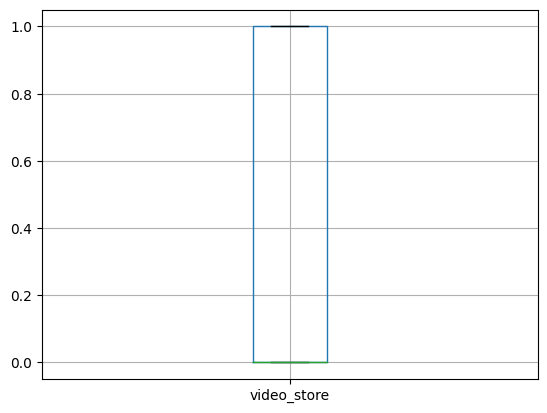

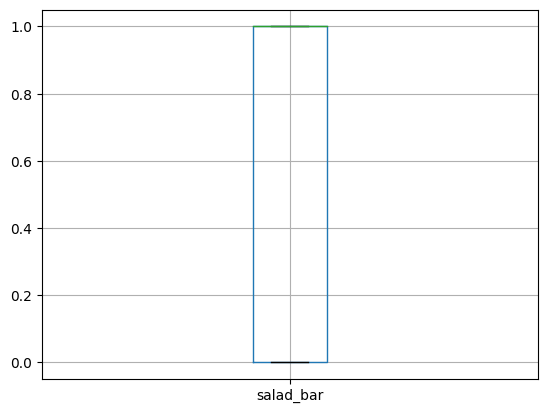

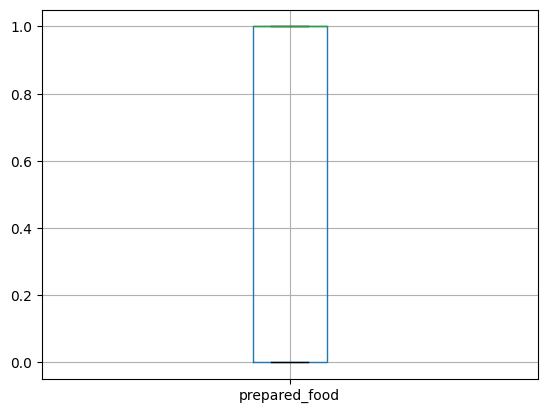

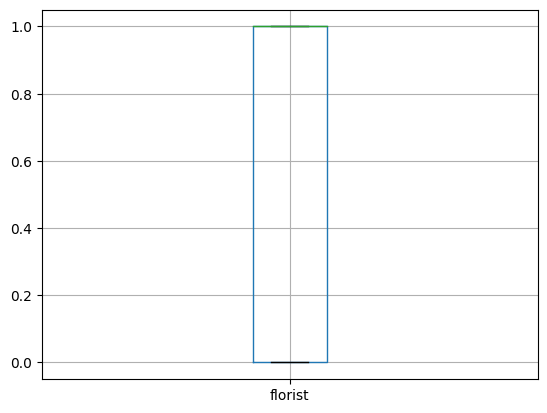

In [446]:
for i in cols:
 plt.subplots()
 axes = train_data.boxplot(column= [i])
plt.show()

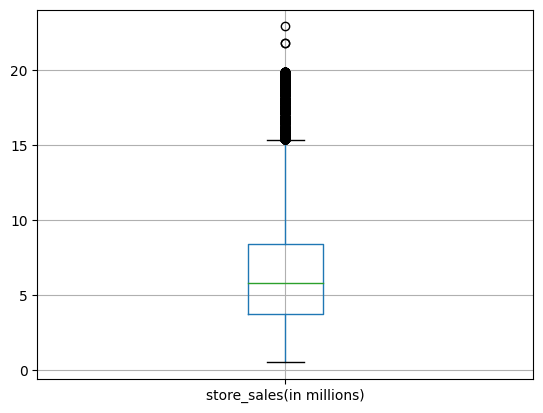

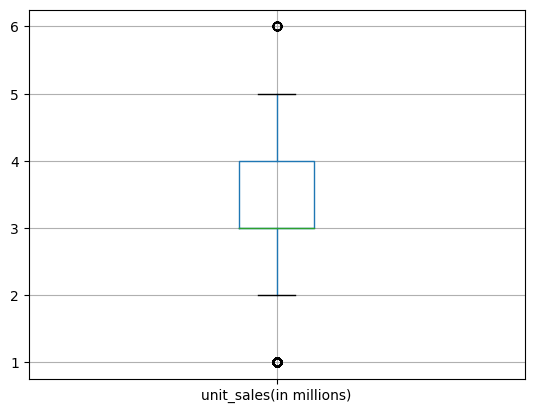

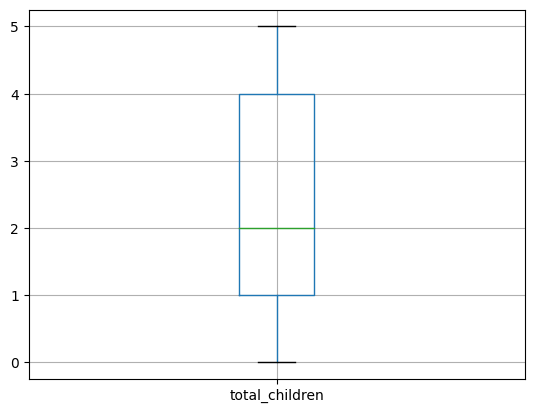

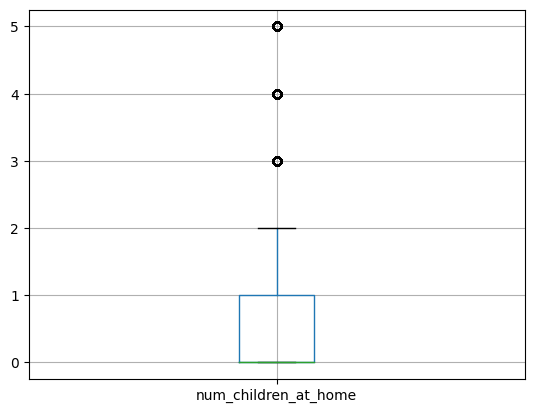

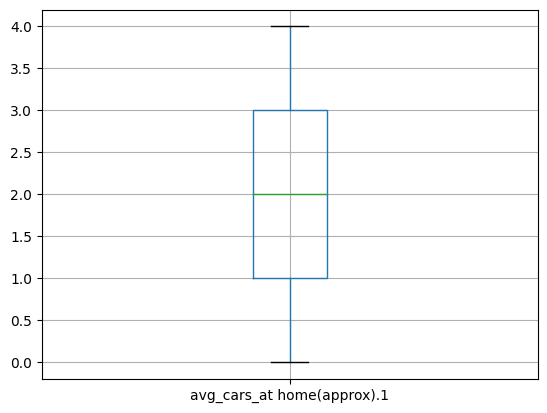

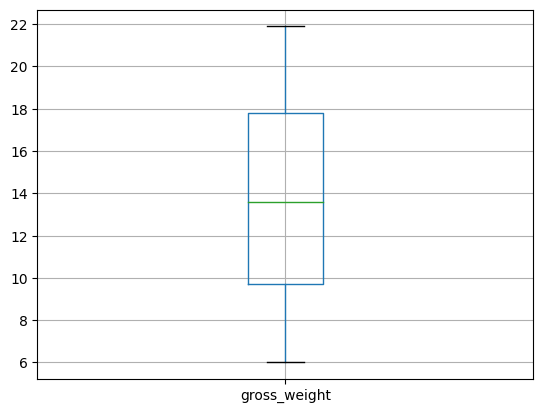

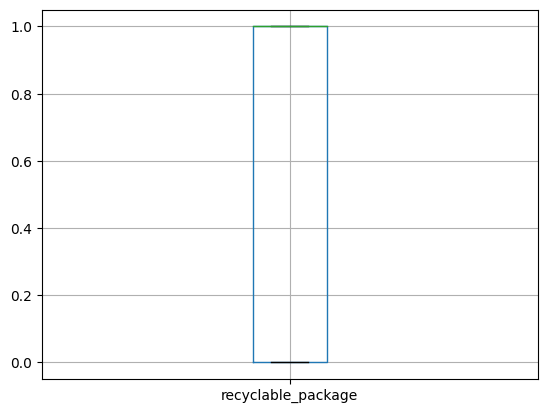

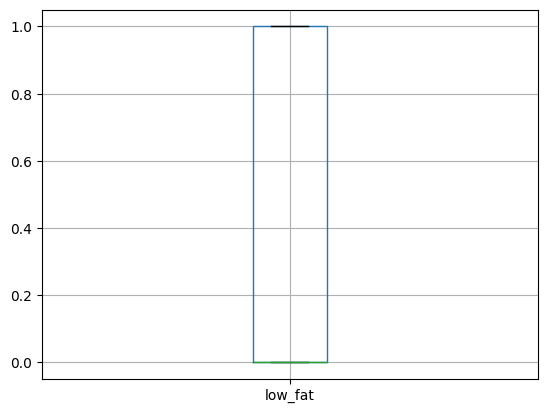

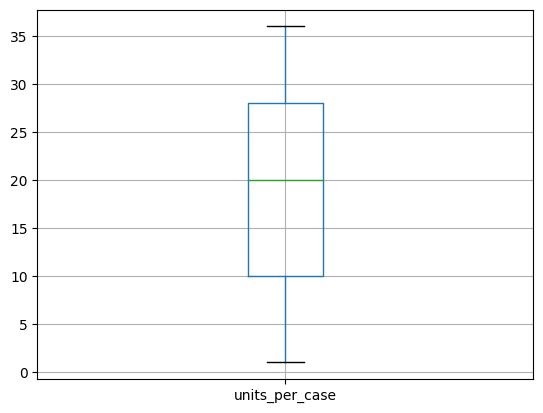

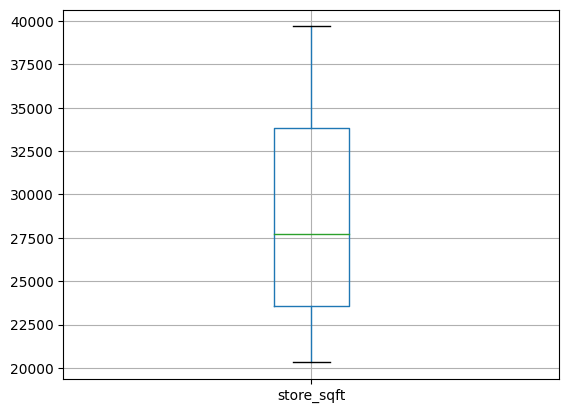

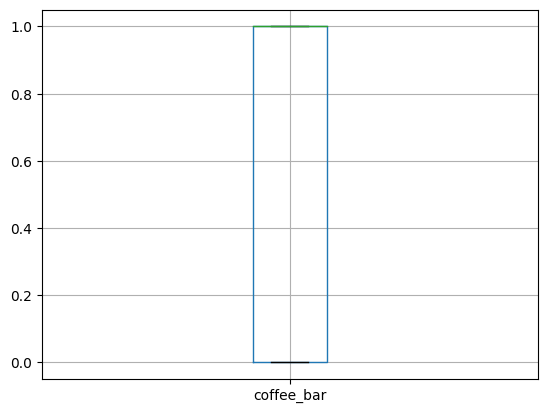

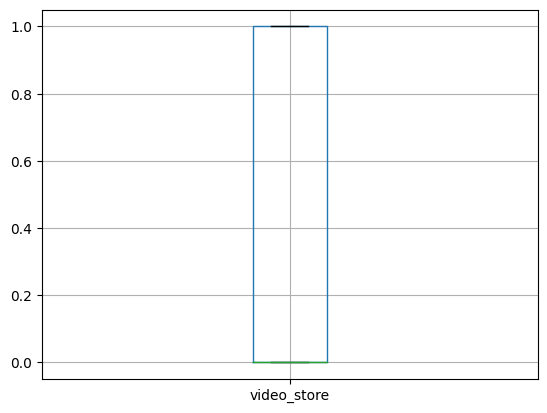

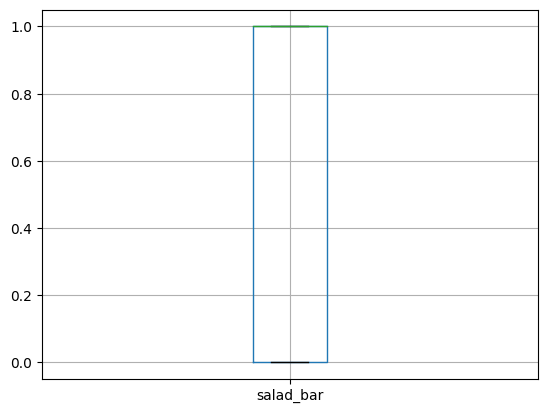

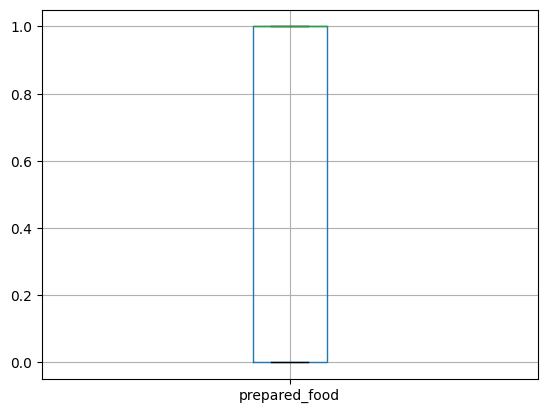

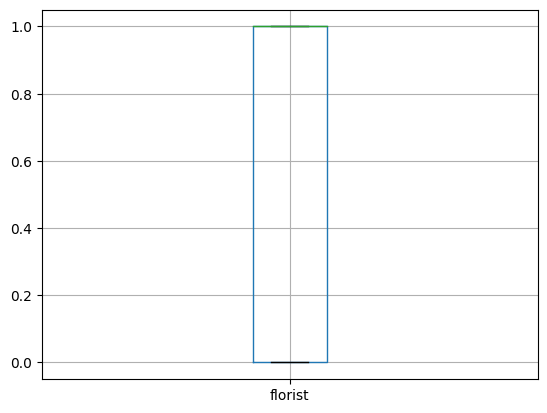

In [447]:
for i in cols:
 plt.subplots()
 axes = test_data.boxplot(column= [i])
plt.show()

##Visualizing the correlation

###Heat map

<Axes: >

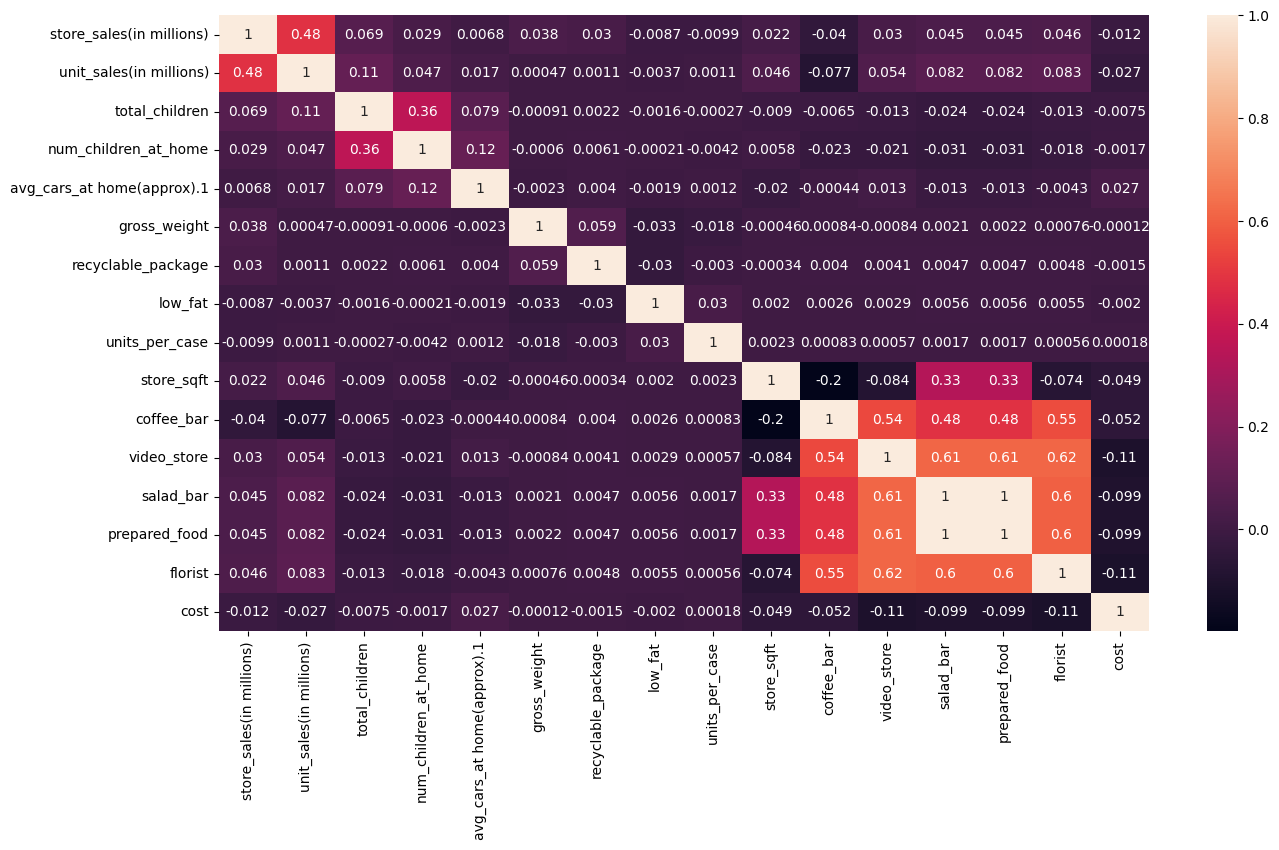

In [448]:
corr_matrix = train_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot=True)

<Axes: >

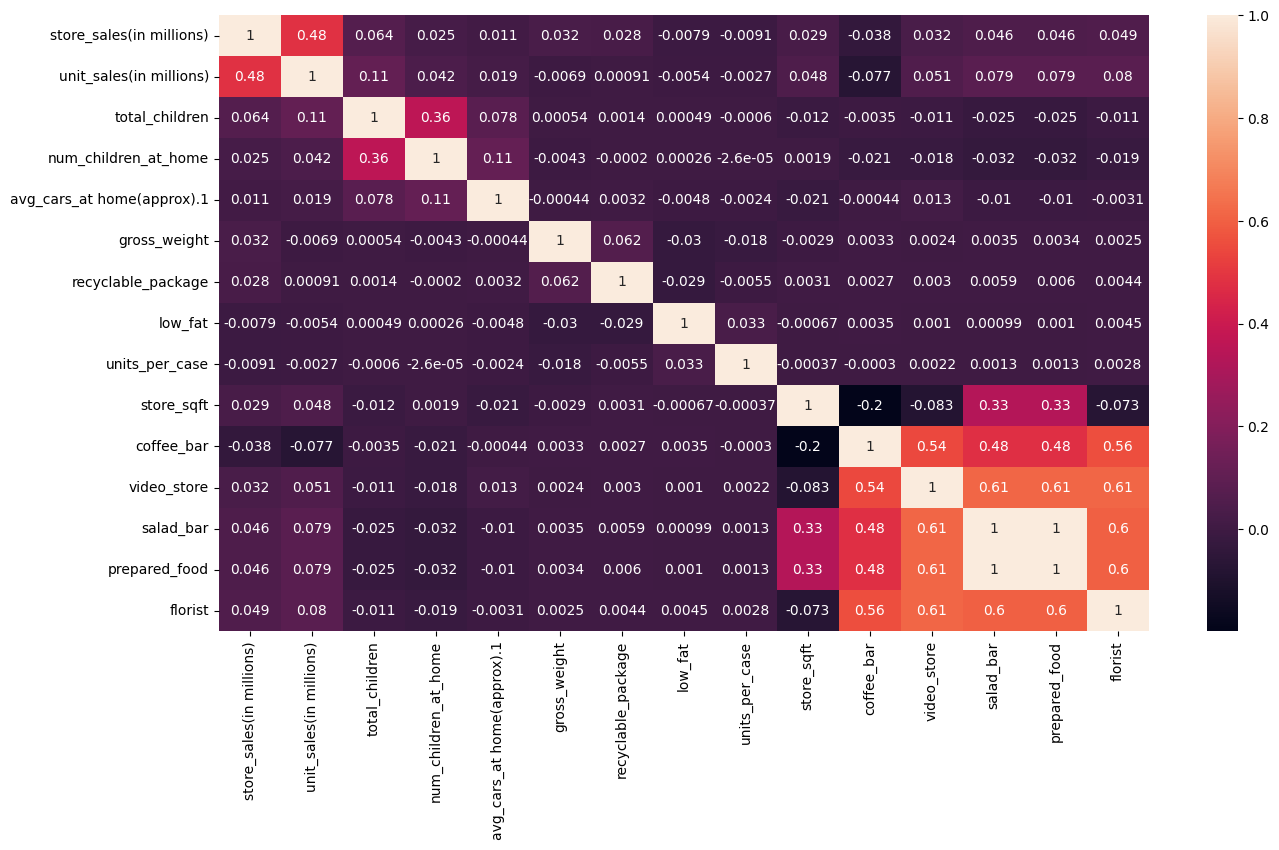

In [449]:
corr_matrix = test_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot=True)

###Scatter diagram

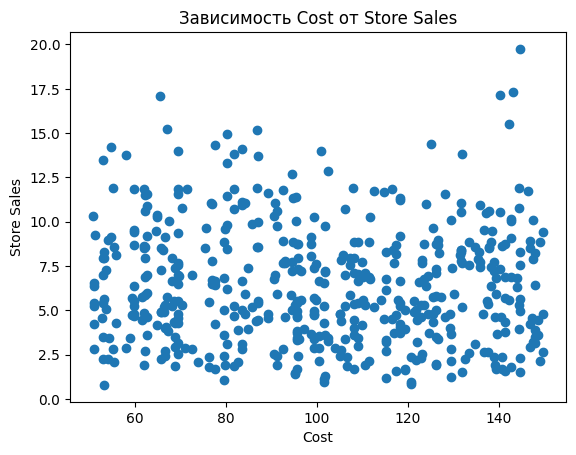

In [450]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['store_sales(in millions)'])
plt.title("Зависимость Cost от Store Sales")
plt.xlabel("Cost")
plt.ylabel("Store Sales")
plt.show()

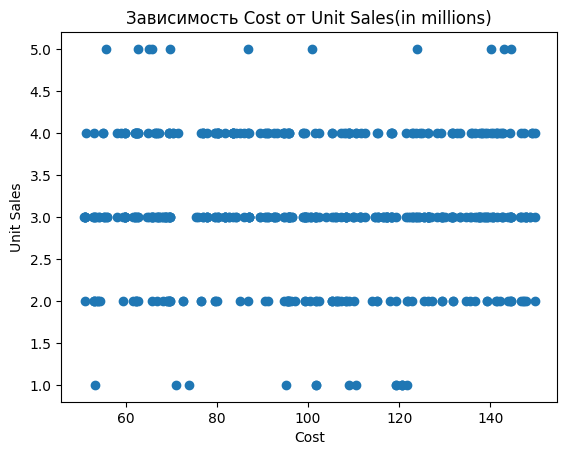

In [451]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['unit_sales(in millions)'])
plt.title("Зависимость Cost от Unit Sales(in millions)")
plt.xlabel("Cost")
plt.ylabel("Unit Sales")
plt.show()

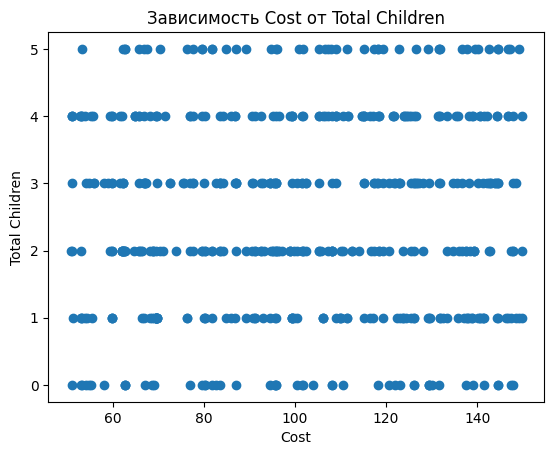

In [452]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['total_children'])
plt.title("Зависимость Cost от Total Children")
plt.xlabel("Cost")
plt.ylabel("Total Children")
plt.show()

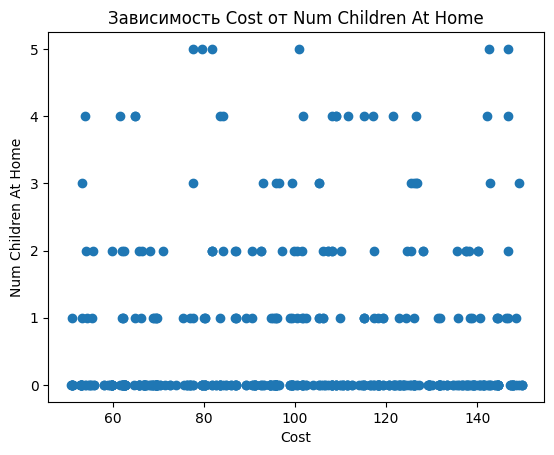

In [453]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['num_children_at_home'])
plt.title("Зависимость Cost от Num Children At Home")
plt.xlabel("Cost")
plt.ylabel("Num Children At Home")
plt.show()

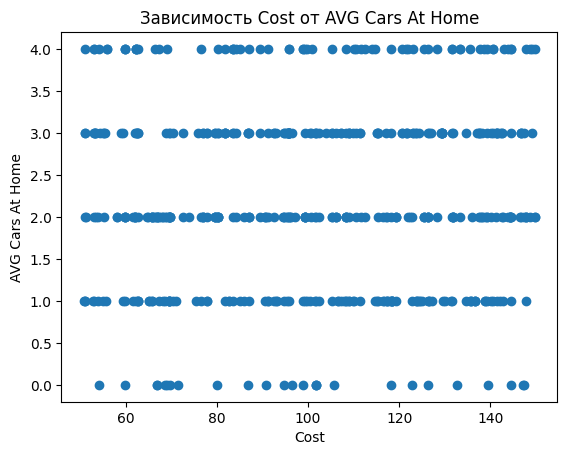

In [454]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['avg_cars_at home(approx).1'])
plt.title("Зависимость Cost от AVG Cars At Home")
plt.xlabel("Cost")
plt.ylabel("AVG Cars At Home")
plt.show()

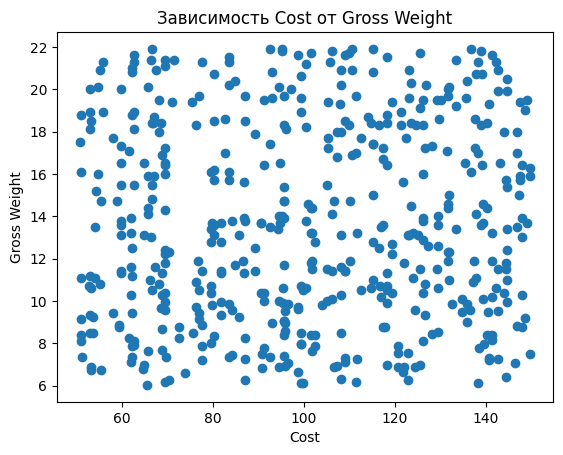

In [455]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['gross_weight'])
plt.title("Зависимость Cost от Gross Weight")
plt.xlabel("Cost")
plt.ylabel("Gross Weight")
plt.show()

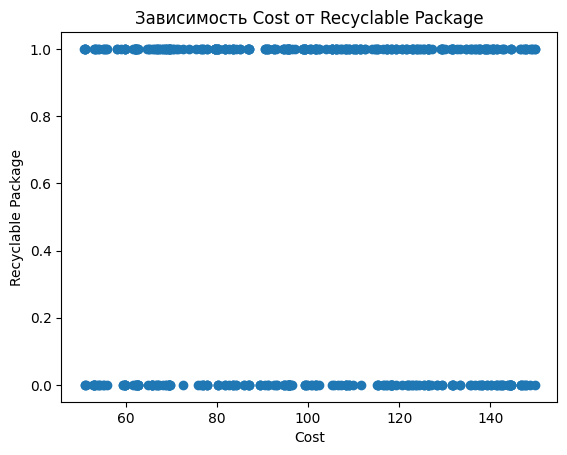

In [456]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['recyclable_package'])
plt.title("Зависимость Cost от Recyclable Package")
plt.xlabel("Cost")
plt.ylabel("Recyclable Package")
plt.show()

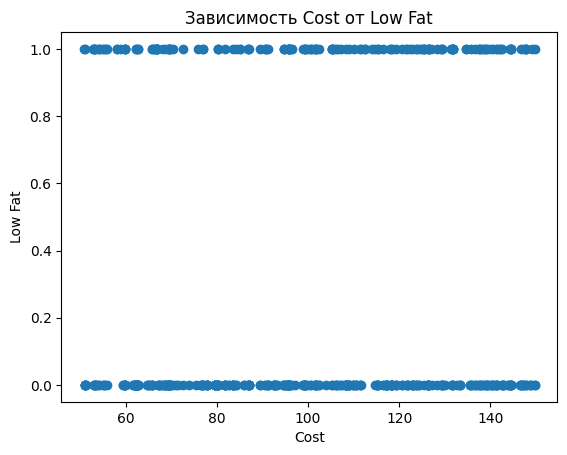

In [457]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['low_fat'])
plt.title("Зависимость Cost от Low Fat")
plt.xlabel("Cost")
plt.ylabel("Low Fat")
plt.show()

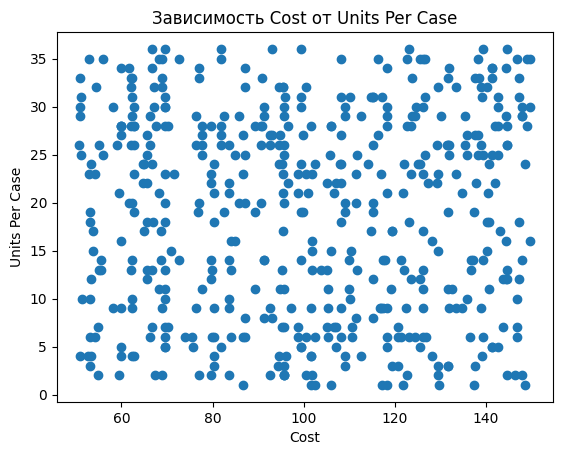

In [458]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['units_per_case'])
plt.title("Зависимость Cost от Units Per Case")
plt.xlabel("Cost")
plt.ylabel("Units Per Case")
plt.show()

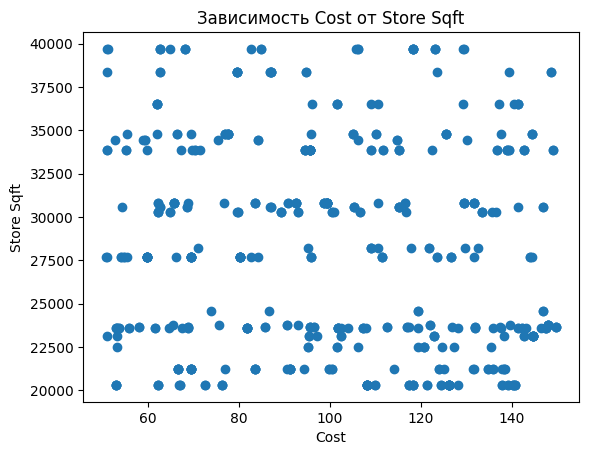

In [459]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['store_sqft'])
plt.title("Зависимость Cost от Store Sqft")
plt.xlabel("Cost")
plt.ylabel("Store Sqft")
plt.show()

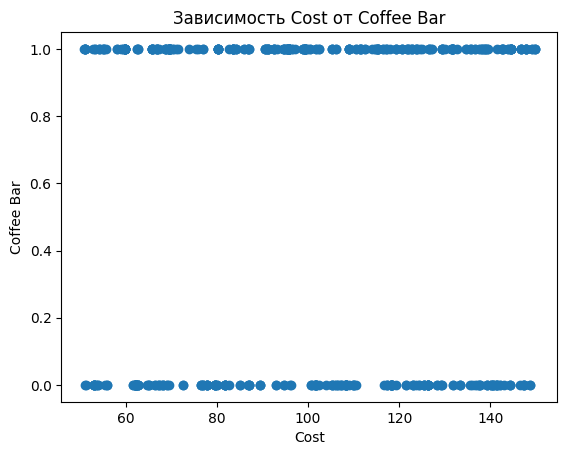

In [460]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['coffee_bar'])
plt.title("Зависимость Cost от Coffee Bar")
plt.xlabel("Cost")
plt.ylabel("Coffee Bar")
plt.show()

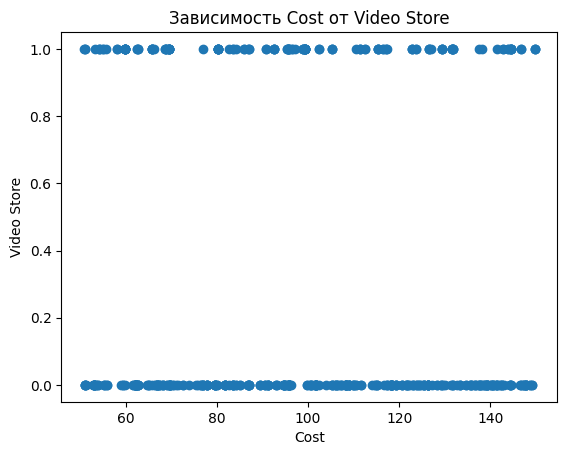

In [461]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['video_store'])
plt.title("Зависимость Cost от Video Store")
plt.xlabel("Cost")
plt.ylabel("Video Store")
plt.show()

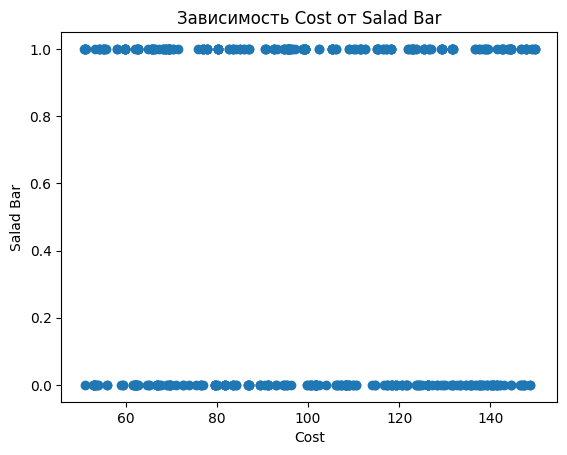

In [462]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['salad_bar'])
plt.title("Зависимость Cost от Salad Bar")
plt.xlabel("Cost")
plt.ylabel("Salad Bar")
plt.show()

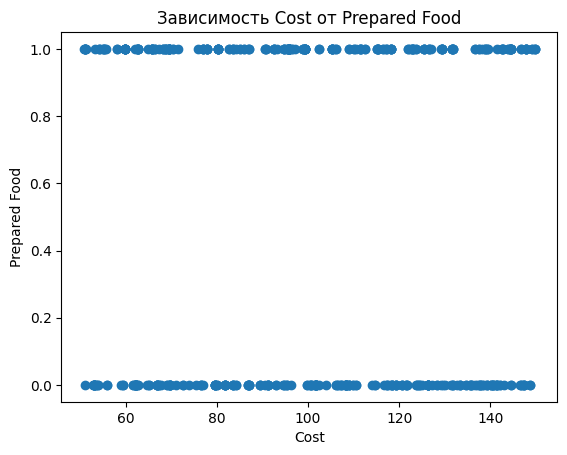

In [463]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['prepared_food'])
plt.title("Зависимость Cost от Prepared Food")
plt.xlabel("Cost")
plt.ylabel("Prepared Food")
plt.show()

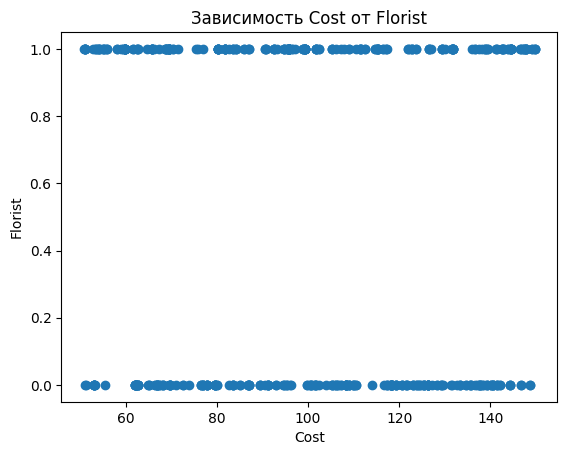

In [464]:
plt.scatter(train_data[:500]['cost'], train_data[:500]['florist'])
plt.title("Зависимость Cost от Florist")
plt.xlabel("Cost")
plt.ylabel("Florist")
plt.show()

##Distribution area Cost

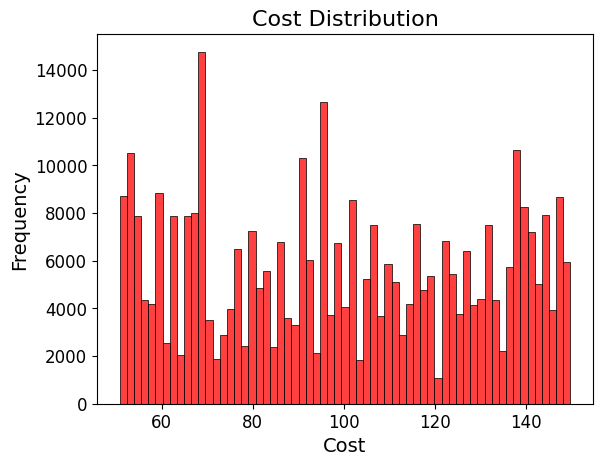

In [465]:
sns.histplot(train_data['cost'], color = 'r')
plt.title('Cost Distribution', fontsize = 16)
plt.xlabel('Cost', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

##Preparing data for prediction

In [466]:
test_data['cost'] = 0

new_train_data = train_data.loc[:, ['florist', 'unit_sales(in millions)', 'prepared_food', 'salad_bar', 'video_store', 'coffee_bar', 'low_fat', 'recyclable_package', 'avg_cars_at home(approx).1', 'num_children_at_home', 'total_children', 'cost']]
new_test_data = test_data.loc[:, ['florist', 'unit_sales(in millions)', 'prepared_food', 'salad_bar', 'video_store', 'coffee_bar', 'low_fat', 'recyclable_package', 'avg_cars_at home(approx).1', 'num_children_at_home', 'total_children', 'cost']]

X_var = new_train_data[new_train_data.columns.drop('cost')]
y_var = new_train_data['cost']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

X2_var = new_test_data[new_test_data.columns.drop('cost')]
y2_var = new_test_data['cost']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_var, y2_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :          florist  unit_sales(in millions)  prepared_food  salad_bar  \
120600      1.0                      4.0            1.0        1.0   
209536      0.0                      4.0            1.0        1.0   
90725       0.0                      3.0            0.0        0.0   
265035      1.0                      2.0            1.0        1.0   
39438       0.0                      4.0            0.0        0.0   

        video_store  coffee_bar  low_fat  recyclable_package  \
120600          0.0         1.0      0.0                 1.0   
209536          0.0         0.0      0.0                 0.0   
90725           0.0         1.0      1.0                 1.0   
265035          0.0         1.0      0.0                 1.0   
39438           0.0         0.0      0.0                 0.0   

        avg_cars_at home(approx).1  num_children_at_home  total_children  
120600                         3.0                   5.0             5.0  
209536                   

##Comparison of algorithms

In [467]:
# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [468]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.016375702539347836
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.016375482364091476
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.01638806488894906
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.01637593238546098
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.016415939873303698
-------------------------------------------------------------------------------


In [469]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.016375305767894255
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.016375085488559926
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.016387668422649715
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.016375534495233435
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.016415553698798657
-------------------------------------------------------------------------------


##Teaching the algorithm 
###We use the fit() method to train the algorithm. The model must find the most optimal coefficients for all attributes. To see what coefficients our regression model has chosen, run the following script

In [470]:
coeff_df = pd.DataFrame(ols.coef_, X_var.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
florist,-4.357047
unit_sales(in millions),-0.407715
prepared_food,-6.175717
salad_bar,4.146989
video_store,-4.175861
coffee_bar,2.313503
low_fat,-0.080755
recyclable_package,-0.101005
avg_cars_at home(approx).1,0.789319
num_children_at_home,-0.061322


In [471]:
coeff_df_ridge = pd.DataFrame(ridge.coef_, X_var.columns, columns=['Coefficient']) 
coeff_df_ridge

,Coefficient
florist,-4.357002
unit_sales(in millions),-0.407726
prepared_food,-5.997741
salad_bar,3.968984
video_store,-4.175795
coffee_bar,2.313448
low_fat,-0.080747
recyclable_package,-0.101002
avg_cars_at home(approx).1,0.789311
num_children_at_home,-0.061328


In [472]:
coeff_df_lasso = pd.DataFrame(lasso.coef_, X_var.columns, columns=['Coefficient']) 
coeff_df_lasso

,Coefficient
florist,-4.308495
unit_sales(in millions),-0.404151
prepared_food,-2.001880
salad_bar,-0.000000
video_store,-4.109602
coffee_bar,2.200678
low_fat,-0.034172
recyclable_package,-0.059071
avg_cars_at home(approx).1,0.779248
num_children_at_home,-0.055238


In [473]:
coeff_df_bayesian = pd.DataFrame(bayesian.coef_, X_var.columns, columns=['Coefficient']) 
coeff_df_bayesian

,Coefficient
florist,-4.338881
unit_sales(in millions),-0.409798
prepared_food,-1.358253
salad_bar,-0.679486
video_store,-4.153445
coffee_bar,2.290198
low_fat,-0.080350
recyclable_package,-0.100694
avg_cars_at home(approx).1,0.788520
num_children_at_home,-0.061473


In [474]:
coeff_df_en = pd.DataFrame(en.coef_, X_var.columns, columns=['Coefficient']) 
coeff_df_en

,Coefficient
florist,-4.206369
unit_sales(in millions),-0.419001
prepared_food,-1.096954
salad_bar,-0.978314
video_store,-3.991056
coffee_bar,2.096927
low_fat,-0.056396
recyclable_package,-0.078561
avg_cars_at home(approx).1,0.779764
num_children_at_home,-0.058331


##Predictions
###To make predictions on test data, run the following script:

In [475]:
y_pred = ols.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
348267,75.76,98.669803
329704,84.16,94.694012
15387,76.88,105.025838
237632,149.08,99.597870
132048,144.31,99.726690
...,...,...
206615,51.47,101.217596
61728,68.91,95.067614
118368,67.01,102.000215
151093,135.50,103.389317


In [476]:
y_pred_ridge = ridge.predict(X_test)
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge}) 
df_ridge

,Actual,Predicted
348267,75.76,98.669770
329704,84.16,94.694037
15387,76.88,105.025795
237632,149.08,99.597815
132048,144.31,99.726663
...,...,...
206615,51.47,101.217565
61728,68.91,95.067625
118368,67.01,102.000215
151093,135.50,103.389317


In [477]:
y_pred_lasso = lasso.predict(X_test)
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso}) 
df_lasso

,Actual,Predicted
348267,75.76,98.650697
329704,84.16,94.683602
15387,76.88,104.886825
237632,149.08,99.517214
132048,144.31,99.812934
...,...,...
206615,51.47,101.244087
61728,68.91,95.104748
118368,67.01,102.078278
151093,135.50,103.450232


In [478]:
y_pred_bayesian = bayesian.predict(X_test)
df_bayesian = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_bayesian}) 
df_bayesian

,Actual,Predicted
348267,75.76,98.660190
329704,84.16,94.704106
15387,76.88,105.007218
237632,149.08,99.584598
132048,144.31,99.718631
...,...,...
206615,51.47,101.210540
61728,68.91,95.077226
118368,67.01,102.003231
151093,135.50,103.393309


In [479]:
y_pred_en = en.predict(X_test)
df_en = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_en}) 
df_en

,Actual,Predicted
348267,75.76,98.597314
329704,84.16,94.759529
15387,76.88,104.827318
237632,149.08,99.472018
132048,144.31,99.714829
...,...,...
206615,51.47,101.184181
61728,68.91,95.155545
118368,67.01,102.059771
151093,135.50,103.447061


##Predicting data

In [480]:
y_pred2 = ols.predict(X2_test)
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y_pred2}) 
df2

,Actual,Predicted
55235,0,97.746408
129759,0,97.611515
118257,0,103.365147
149805,0,97.118571
198740,0,95.810292
...,...,...
84682,0,94.616588
230314,0,101.449346
197947,0,96.110324
138848,0,103.843577


In [481]:
subm = pd.DataFrame()
subm['cost'] = df2['Predicted']
subm.insert(0, 'id', range(1, len(subm)+1))
subm

,id,cost
55235,1,97.746408
129759,2,97.611515
118257,3,103.365147
149805,4,97.118571
198740,5,95.810292
...,...,...
84682,48041,94.616588
230314,48042,101.449346
197947,48043,96.110324
138848,48044,103.843577


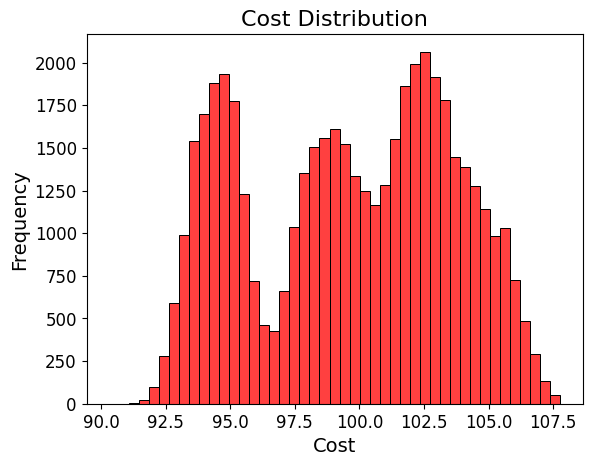

In [482]:
sns.histplot(subm['cost'], color = 'r')
plt.title('Cost Distribution', fontsize = 16)
plt.xlabel('Cost', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [483]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25.701594390233574
Mean Squared Error: 880.8194688644631
Root Mean Squared Error: 29.67860287925399


In [484]:
subm.to_csv('submission')